# Предпочтения клиентов авиакомпании F9

**Задача:** понять предпочтения пользователей, покупающих билеты на те или иные направления.

## Предобработка данных

In [1]:
import pandas as pd

flights_by_model = pd.read_csv('/datasets/query_1.csv')
flights_by_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [2]:
avg_flights_by_city = pd.read_csv('/datasets/query_3.csv')
avg_flights_by_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


В таблицах не содержится пропусков, однако данные в столбце *average_flights* необходимо привести к типу целых чисел.

In [3]:
avg_flights_by_city['average_flights'] = avg_flights_by_city['average_flights'].astype('int')

In [4]:
festivals_and_tickets = pd.read_csv('/datasets/query_last.csv')
festivals_and_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


С данной таблицей всё в порядке, менять ничего не надо.

## Статистика по городам и моделям самолётов

In [5]:
import pylab

flights_by_model.plot( kind='pie', y='flights_amount', x='model', figsize=(7,7))
pylab.legend(flights_by_model['model'])

На графике наглядно показаны наиболее популярные модели самолётов: Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi Superjet-100. Даже если сложить рейсы, выполненные всеми моделями самолётов Airbus и Boeing, то таких рейсов всё равно будет меньше, чем у каждого из лидеров в отдельности.<br><br>Интересно, что одной из самых популярных моделей оказалась *Cessna 208 Caravan*. Это американский самолёт, который предназначен для перелётов в сложных погодных условиях и в отсутствии (или недостаточной оборудованности) аэродромных площадок. Вместимость такого самолёта - 12 человек.<br><br>*Bombardier CRJ-200* и *Sukhoi Superjet-100* находятся в топе вполне обоснованно. Однако стоит заметить, что это самолёты регионального назначения, соответственно, на большие расстояния они не летают и редко выполняют международные рейсы.

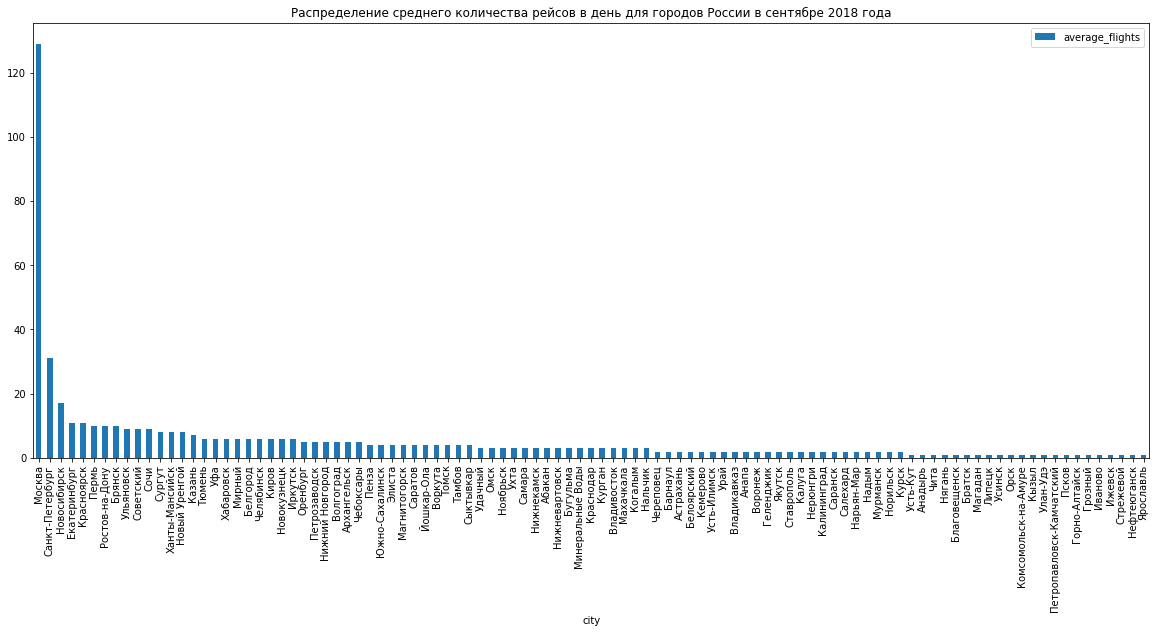

In [6]:
sorted_cities = avg_flights_by_city.sort_values(by='average_flights', ascending=False).reset_index(drop=True)
sorted_cities.plot(kind='bar', y='average_flights', x='city', figsize=(20,8), title='Распределение среднего количества рейсов в день для городов России в сентябре 2018 года')

Отчётливо выделяется среди всех городов Москва. Относительно высокий пассажиропоток в Санкт-Петербурге и Новосибирске. Оставшиеся города можно разделить на блоки. Екатеринбург и Красноярск, например, имеют примерно равное количество рейсов. То же самое можно сказать о блоке "Пермь, Ростов-на-Дону, Брянск". Чем меньше пассажиропоток, тем крупнее становятся блоки. Рассмотрим на первые 10 направлений более подробно.

In [7]:
print('Топ-10 городов по количеству рейсов')
for city in sorted_cities['city'].head(10):
    print(city)

Топ-10 городов по количеству рейсов
Москва
Санкт-Петербург
Новосибирск
Екатеринбург
Красноярск
Пермь
Ростов-на-Дону
Брянск
Ульяновск
Советский


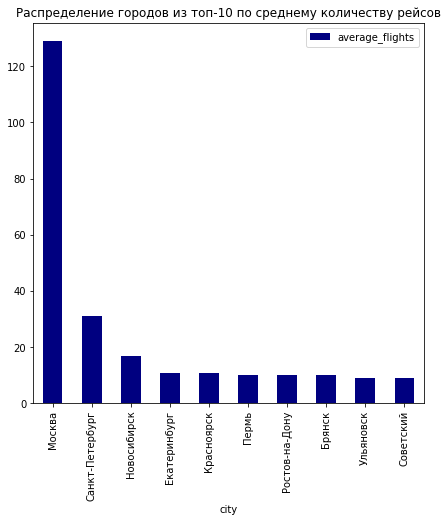

In [8]:
top10_cities = sorted_cities.head(10)
top10_cities.plot(kind='bar', x='city', y='average_flights', figsize=(7,7), stacked=True, colormap='jet', title='Распределение городов из топ-10 по среднему количеству рейсов')

Самым популярным направлением за данный период оказалась Москва. На Санкт-Петербург и Новосибирск также приходится большое количество рейсов. Между остальными городами в топ-10 трафик распределён примерно одинаково.

## Проверка гипотезы

**Гипотеза**<br>Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время
<br><br>*Нулевая гипотеза:* Среднее количество проданных билетов во время фестивалей равно среднему количеству билетов, проданных в обычное время

In [9]:
fest_weeks = festivals_and_tickets.query('festival_week == week_number')
ordinary_weeks = festivals_and_tickets.query('festival_week != week_number').head(3)

In [10]:
from scipy import stats as st
import numpy as np


alpha = 0.05

results = st.ttest_rel(
    fest_weeks['ticket_amount'], 
    ordinary_weeks['ticket_amount'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3912022297432953
Не получилось отвергнуть нулевую гипотезу


Путём проверки гипотезы о равенстве средних двух зависимых выборок с уровнем статистической значимости 5% удалось подтвердить нулевую гипотезу. В качестве критерия использовался столбец "количество билетов" из двух таблиц: продажи билетов в течение недель, когда проводились фестивали, и в течение тех, когда фестивали не проводились. Таким образом, можно утверждать, что средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.

## Общий вывод

1. Больше всего билетов покупают на рейсы 3 типов самолётов: Sukhoi Superjet, Bombardier и Cessna.
2. Спрос на билеты в Москву, Санкт-Петербург и Новосибирск самый высокий среди российских городов.
3. Факт проведения фестивалей не влияет на спрос на авиабилеты.